In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv('/Users/alexfriedman/Downloads/lrFinalProject/final_project/data/final_data.csv')


#cleaning some 
df['occupancy_non_residential'] = df['occupancy_non_residential'].fillna(0)
df['occupancy_residential'] = df['occupancy_residential'].fillna(0)
df[['station_count', 'avg_ride_duration_secs_start', 'n_rides_end',
       'avg_ride_duration_secs_end', 'n_rides_start']] = df[['station_count', 'avg_ride_duration_secs_start', 'n_rides_end',
       'avg_ride_duration_secs_end', 'n_rides_start']].fillna(0)
df['year_built_non_residential'] = df['year_built_non_residential'].fillna(df['year_built_non_residential'].mean())
df['year_built_residential'] = df['year_built_residential'].fillna(df['year_built_residential'].mean())
gramercy_median_home_val = 726595.0
df['MdVlE'] = df['MdVlE'].fillna(gramercy_median_home_val)
df.dropna(inplace=True)


In [84]:
df = df.drop(columns=['total_ghg_emissions_intensity'])

In [85]:
# df = df[df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)]
df

,NTACode,n_rides_start,avg_ride_duration_secs_start,n_rides_end,avg_ride_duration_secs_end,primary_property_type,multifamily_housing_gross,site_eui_kbtu_ft,largest_property_use_type_residential,occupancy_residential,...,Pv125t149E,Pv150t174E,Pv175t184E,Pv185t199E,Pv200t299E,Pv300t399E,Pv400t499E,Pv500plE,Pop_1E,station_count
0,BK09,252137.0,2181.727413,252301.0,1800.981875,91,8641796.0,72.554945,1,98.525641,...,362,418,89,171,1452,1133,1583,14382,24140,81.0
1,BK17,0.0,0.000000,0.0,0.000000,91,8491196.0,85.092308,1,99.358974,...,3287,2949,774,1037,9755,8100,7387,18824,66293,0.0
2,BK19,0.0,0.000000,0.0,0.000000,93,7225352.0,76.434409,1,99.619565,...,2139,1588,559,708,4291,3002,2401,7733,34157,0.0
3,BK21,0.0,0.000000,0.0,0.000000,23,3043205.0,119.865217,1,98.529412,...,1886,1855,713,454,4289,2683,1552,3473,29677,0.0
4,BK23,0.0,0.000000,0.0,0.000000,12,7340578.0,75.583333,1,99.444444,...,364,844,104,313,2032,2127,1677,4687,15754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,QN70,326262.0,1800.754455,318447.0,1950.728969,96,5494585.0,87.130208,1,98.620690,...,3733,3662,900,1711,12255,9720,8879,21183,77252,206.0
169,QN71,106531.0,1660.924561,111972.0,2333.360949,52,3202347.0,83.228846,1,98.900000,...,1599,1769,466,664,4575,2281,2365,6812,28110,74.0
170,QN72,153177.0,2446.146617,153880.0,2914.404306,44,2491035.0,87.661364,1,99.054054,...,1725,2438,728,1366,7558,6518,5503,15121,48179,132.0
171,QN76,0.0,0.000000,0.0,0.000000,5,230000.0,80.000000,0,100.000000,...,2207,2094,637,1295,6838,6510,5265,7220,39079,0.0


In [86]:
df.to_csv('final_data.csv')

<Axes: xlabel='site_eui_kbtu_ft', ylabel='Count'>

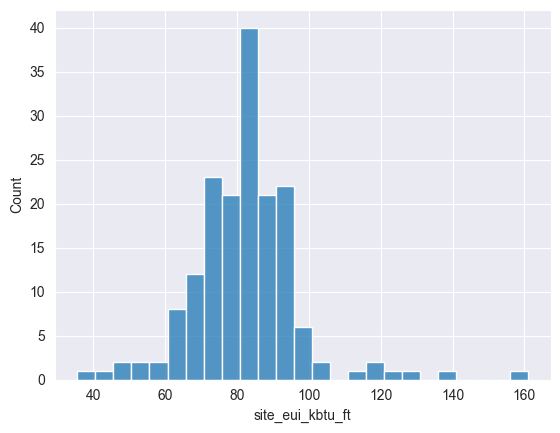

In [88]:
# sns.histplot(df['site_eui_kbtu_ft'][df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)])

In [90]:
df['site_eui_kbtu_ft'][df['site_eui_kbtu_ft'] < df['site_eui_kbtu_ft'].quantile(0.99)]

0       72.554945
1       85.092308
2       76.434409
3      119.865217
4       75.583333
          ...    
168     87.130208
169     83.228846
170     87.661364
171     80.000000
172     53.660000
Name: site_eui_kbtu_ft, Length: 170, dtype: float64

In [89]:
df['total_ghg_emissions_intensity'] = df['total_ghg_emissions_intensity'] - df.total_ghg_emissions_intensity.mean()
sm.qqplot(df['total_ghg_emissions_intensity'])

KeyError: 'total_ghg_emissions_intensity'

In [93]:
import data_pull as dp
import geopandas as gpd

nta_geodf: gpd.GeoDataFrame = dp.get_nta_geog() # we have our geopandas multipolygon in the column called "geometry"

mg = nta_geodf.merge(df, on='NTACode')
# mg(column='largest_property_use_type_residential', legend=True, cmap='viridis')


In [96]:
mg

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,n_rides_start,avg_ride_duration_secs_start,...,Pv125t149E,Pv150t174E,Pv175t184E,Pv185t199E,Pv200t299E,Pv300t399E,Pv400t499E,Pv500plE,Pop_1E,station_count
0,4,Queens,81,QN08,St. Albans,45401.316803,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",0.0,0.000000,...,1695,1876,718,990,11188,9477,7830,13217,54626,0.0
1,2,Bronx,5,BX28,Van Cortlandt Village,21945.719299,2.566612e+07,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...",10860.0,1890.496551,...,2436,3052,810,1763,8316,7182,4076,6204,51157,23.0
2,4,Queens,81,QN55,South Ozone Park,36708.169305,8.246139e+07,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",0.0,0.000000,...,3867,4902,1420,3432,15827,12579,9891,16331,85411,0.0
3,3,Brooklyn,47,BK50,Canarsie,43703.609666,8.208968e+07,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",0.0,0.000000,...,3412,3508,992,2298,15391,12452,10456,22835,88367,0.0
4,2,Bronx,5,BX41,Mount Hope,18937.247819,1.471671e+07,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...",17362.0,5180.960357,...,4140,3539,1108,1594,8773,4413,2046,2097,52973,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3,Brooklyn,47,BK93,Starrett City,17414.782656,1.159895e+07,"MULTIPOLYGON (((-73.88829 40.64672, -73.88829 ...",0.0,0.000000,...,589,189,521,343,1752,2277,609,1010,12388,0.0
168,3,Brooklyn,47,BK73,North Side-South Side,28099.984508,2.885436e+07,"MULTIPOLYGON (((-73.95814 40.72440, -73.95772 ...",865487.0,2572.642797,...,1952,1618,663,1403,7738,4662,4155,18039,54330,152.0
169,1,Manhattan,61,MN28,Lower East Side,26879.113421,2.330069e+07,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",725648.0,2485.911858,...,5457,3516,1648,1397,9852,5423,4533,13841,72789,134.0
170,3,Brooklyn,47,BK40,Windsor Terrace,19033.671554,1.404167e+07,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",48706.0,1727.183243,...,361,407,246,217,2235,2482,2864,10767,22031,30.0


([], [])

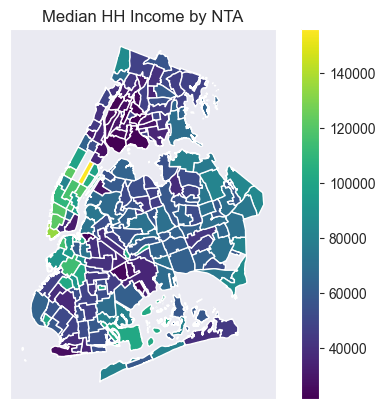

In [99]:
mg.plot(column='MdHHIncE', legend=True, cmap='viridis')
plt.title('Median HH Income by NTA')
plt.xticks([])
plt.yticks([])